In [1]:
# setup
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import (
    ColumnDataSource, Range1d, DataRange1d, DatetimeAxis,
    TickFormatter, DatetimeTickFormatter, FuncTickFormatter,
    Grid, Legend, Plot, BoxAnnotation, Span, CustomJS, Rect, Circle, Line,
    HoverTool, BoxZoomTool, PanTool, WheelZoomTool,
    WMTSTileSource, LabelSet
    )
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn, Div

import numpy as np
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'plot_app'))
from pyulog import *
from pyulog.px4 import *
from plotting import *
from config import *
from notebook_helper import *

output_notebook()

Loading BokehJS ...

In [3]:
file_name = 'logs/log_60_2023-1-25-10-14-04.ulg' # TODO: fill in file name
ulog = ULog(file_name)
data = ulog.data_list
px4_ulog = PX4ULog(ulog)
px4_ulog.add_roll_pitch_yaw()
use_downsample = False

print("message names: {:}".format(sorted([d.name for d in data])))
print_ulog_info(ulog)

message names: ['action_request', 'actuator_armed', 'actuator_controls_0', 'actuator_controls_3', 'actuator_outputs', 'battery_status', 'commander_state', 'cpuload', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_attitude', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_baro_bias', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_event_flags', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_global_position', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_gps_status', 'estimator_innovation_test_ratios', 'estimator_innovation_test_ratios', 'estimator_innovation_te

In [3]:
use_downsample = True # you may want to activate this for large logs (But you will not see all samples when zooming in)

In [32]:
# load a dataset to inspect the field names and types
vslam_sensor_data = [ elem for elem in data if elem.name == 'vehicle_visual_odometry' and elem.multi_id == 0][0]
types_list = [(f.type_str, f.field_name) for f in vslam_sensor_data.field_data]
for ftype, fname in types_list: print("{:10s} {:}".format(ftype, fname))

uint64_t   timestamp
uint64_t   timestamp_sample
float      x
float      y
float      z
float      q[0]
float      q[1]
float      q[2]
float      q[3]
float      q_offset[0]
float      q_offset[1]
float      q_offset[2]
float      q_offset[3]
float      pose_covariance[0]
float      pose_covariance[1]
float      pose_covariance[2]
float      pose_covariance[3]
float      pose_covariance[4]
float      pose_covariance[5]
float      pose_covariance[6]
float      pose_covariance[7]
float      pose_covariance[8]
float      pose_covariance[9]
float      pose_covariance[10]
float      pose_covariance[11]
float      pose_covariance[12]
float      pose_covariance[13]
float      pose_covariance[14]
float      pose_covariance[15]
float      pose_covariance[16]
float      pose_covariance[17]
float      pose_covariance[18]
float      pose_covariance[19]
float      pose_covariance[20]
float      vx
float      vy
float      vz
float      rollspeed
float      pitchspeed
float      yawspeed
float     

In [5]:
plot = plot_map(ulog, plot_config) # gps map
if plot != None: show(plot)

In [33]:
estimator_localpos_data = [ elem for elem in data if elem.name == 'estimator_local_position' and elem.multi_id == 0][0]
types_list = [(f.type_str, f.field_name) for f in estimator_localpos_data.field_data]
for ftype, fname in types_list: 
    print("{:10s} {:}".format(ftype, fname))

uint64_t   timestamp
uint64_t   timestamp_sample
uint64_t   ref_timestamp
double     ref_lat
double     ref_lon
float      x
float      y
float      z
float      delta_xy[0]
float      delta_xy[1]
float      delta_z
float      vx
float      vy
float      vz
float      z_deriv
float      delta_vxy[0]
float      delta_vxy[1]
float      delta_vz
float      ax
float      ay
float      az
float      heading
float      delta_heading
float      ref_alt
float      dist_bottom
float      eph
float      epv
float      evh
float      evv
float      vxy_max
float      vz_max
float      hagl_min
float      hagl_max
bool       xy_valid
bool       z_valid
bool       v_xy_valid
bool       v_z_valid
uint8_t    xy_reset_counter
uint8_t    z_reset_counter
uint8_t    vxy_reset_counter
uint8_t    vz_reset_counter
uint8_t    heading_reset_counter
bool       heading_good_for_control
bool       xy_global
bool       z_global
bool       dist_bottom_valid
uint8_t    dist_bottom_sensor_bitfield


In [ ]:
estimator_local_position = ulog.get_dataset('estimator_local_position').data
est_x = estimator_local_position['x']
est_y = estimator_local_position['y']
plt.plot(est_x,est_y)
plt.axis('equal')
plt.show()

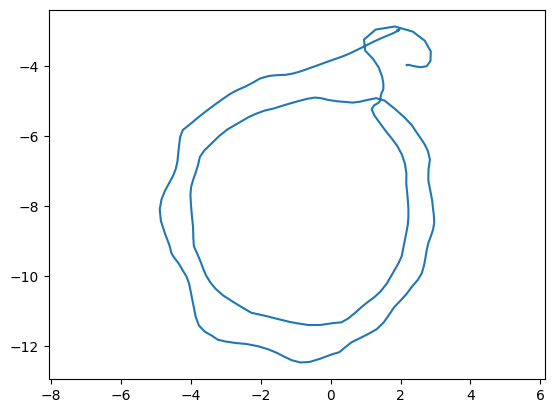

In [42]:
estimator_local_position = ulog.get_dataset('estimator_local_position').data
est_x = estimator_local_position['x']
est_y = estimator_local_position['y']
plt.plot(est_x,est_y)
plt.axis('equal')
plt.show()

In [19]:
print(estimator_localpos_data)

In [36]:
print(vslam_sensor_data.data['y'])

[-1.1641532e-09 -1.1641532e-09 -1.1641532e-09]


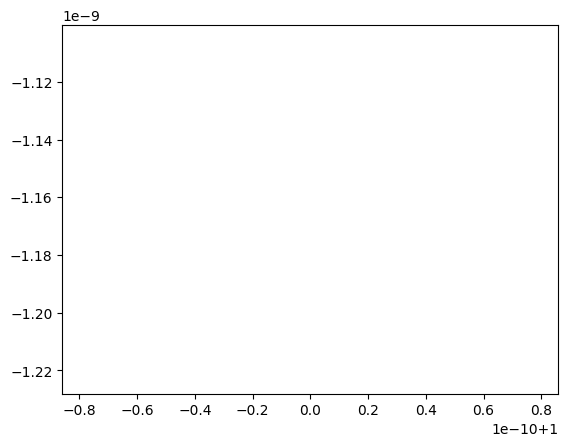

In [37]:
import matplotlib.pyplot as plt
#plt.plot(estimator_localpos_data.data['x'],estimator_localpos_data.data['y'])
plt.plot(vslam_sensor_data.data['x'],vslam_sensor_data.data['y'])
plt.axis('equal')
plt.show()

In [8]:
print(plot_config)

{'maps_line_color': '#2877a2', 'plot_width': 840, 'plot_height': {'normal': 400, 'small': 336, 'large': 519}, 'mission_setpoint_color': '#e58C33'}


In [7]:
plot = plot_map(ulog, plot_config) # gps map
if plot != None: show(plot)

In [12]:
# plot raw acceleration sensor data
data_plot = DataPlot(data, plot_config, 'sensor_combined',
        y_axis_label = '[m/s^2]', title = 'Raw Acceleration', plot_height = 'normal')
data_plot.add_graph(['accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 'accelerometer_m_s2[2]'],
                    colors3, ['x', 'y', 'z'], use_downsample=use_downsample)
show(data_plot.finalize())

In [7]:
# a more complex plot with multiple datasets
data_plot = DataPlot(data, plot_config, 'vehicle_magnetometer', y_start=0, title = 'Thrust and Magnetic Field',
                     plot_height='normal')
data_plot.add_graph([lambda data: ('len_mag', 
    np.sqrt(data['magnetometer_ga[0]']**2 + data['magnetometer_ga[1]']**2 + data['magnetometer_ga[2]']**2))],
    colors2[0:1], ['Norm of Magnetic Field'], use_downsample=use_downsample)

data_plot.change_dataset('actuator_controls_0')
data_plot.add_graph([lambda data: ('thrust', data['control[3]'])], colors2[1:2], ['Thrust'],
                    use_downsample=use_downsample)

show(data_plot.finalize())

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [8]:
# plot low-pass filtered raw acceleration sensor data
from scipy.signal import butter, lfilter
cur_data = ulog.get_dataset('sensor_combined').data
t = cur_data['timestamp']

fs = len(t) / ((t[-1]-t[0])/1e6) # sample rate [Hz]
cutoff = 10 # cutoff freq [Hz]
order = 5
B, A = butter(order, cutoff / (fs / 2), btype='low') # Butterworth low-pass
filtered_signal = lfilter(B, A, cur_data['accelerometer_m_s2[0]'])

p = figure(plot_width = 800, active_scroll='wheel_zoom')
p.line(t, cur_data['accelerometer_m_s2[0]'], color='red', alpha = 0.5)
p.line(t, filtered_signal, color='blue', alpha = 0.8)
show(p)

In [9]:
# get the raw acceleration
sensor_combined = ulog.get_dataset('sensor_combined').data
ax = sensor_combined['accelerometer_m_s2[0]']
ay = sensor_combined['accelerometer_m_s2[1]']
az = sensor_combined['accelerometer_m_s2[2]']
t = sensor_combined['timestamp']

In [10]:
# and plot it
p = figure(plot_width = 800, active_scroll='wheel_zoom')
p.line(t, ax, color='red', alpha = 0.8, legend="accel x")
p.line(t, ay, color='green', alpha = 0.8, legend="accel y")
p.line(t, az, color='blue', alpha = 0.8, legend="accel z")
show(p)

In [11]:
# select a window
dt = (t[-1]-t[0]) / len(t) / 1e6 # delta t in seconds
start_index = int(20 / dt) # select start of window (seconds): make sure the vehicle is hovering at that point
window_len_s = 3 # window length in seconds
tw=t[start_index:int(start_index+window_len_s/dt)]
axw=ax[start_index:int(start_index+window_len_s/dt)]
ayw=ay[start_index:int(start_index+window_len_s/dt)]
azw=az[start_index:int(start_index+window_len_s/dt)]

In [12]:
# and plot it
p = figure(plot_width = 800, active_scroll='wheel_zoom')
p.line(tw, axw, color='red', alpha = 0.8, legend="accel x")
p.line(tw, ayw, color='green', alpha = 0.8, legend="accel y")
p.line(tw, azw, color='blue', alpha = 0.8, legend="accel z")
show(p)

In [13]:
# FFT frequency plot
import scipy
import scipy.fftpack
from scipy import pi

FFT_x = abs(scipy.fft(axw))
FFT_y = abs(scipy.fft(ayw))
FFT_z = abs(scipy.fft(azw))

freqs = scipy.fftpack.fftfreq(len(axw), dt)

p = figure(plot_width = 800, active_scroll='wheel_zoom')
p.line(freqs,20*scipy.log10(FFT_x), color='red', alpha = 0.8, legend="x")
p.line(freqs,20*scipy.log10(FFT_y), color='green', alpha = 0.8, legend="y")
p.line(freqs,20*scipy.log10(FFT_z), color='blue', alpha = 0.8, legend="z")
p.legend.click_policy="hide"
show(p)

TypeError: 'module' object is not callable

### spectogram

In [14]:
window = 'hann'
window_length = 256
noverlap = 128

data_set = {'ax': ax, 'ay': ay, 'az': az}
legend = ['X','Y''Z']

fs = 250

# calculate the spectogram
psd = dict()
for key, val in data_set.items():
    f, t, psd[key] = scipy.signal.spectrogram(
        val,fs=fs, window=window, nperseg=window_length, noverlap=noverlap, scaling='density')
    
# sum all psd's
key_it = iter(psd)
sum_psd = psd[next(key_it)]
for key in key_it:
    sum_psd += psd[key]

#### plot with bokeh

In [15]:
def plot_spec(t, f, psd, legend):
    color_mapper = LinearColorMapper(palette=viridis(256),low=-80, high=0)

    im = [10 * np.log10(psd)]
    p = figure(title='Acceleration Power Spectral Density ' + legend + ' [dB]',
        plot_width=800,x_range=(t[0], t[-1]),y_range=(f[0], f[-1]),
        x_axis_label='Time',y_axis_label='[Hz]',toolbar_location='above')
    p.image(image=im, x=t[0], y=f[0],dw=(t[-1]-t[0]), dh=(f[-1]-f[0]),color_mapper=color_mapper)
    color_bar = ColorBar(color_mapper=color_mapper,
                         major_label_text_font_size="5pt",
                         ticker=BasicTicker(desired_num_ticks=5),
                         formatter=PrintfTickFormatter(format="%f"),
                         label_standoff=6, border_line_color=None, location=(0, 0))
    p.add_layout(color_bar,'right')
    p.add_tools(BoxZoomTool(dimensions="width"))
    return p

In [16]:
show(plot_spec(t,f,sum_psd,'X Y Z'))